In [1]:
from helper import *
!pip install plotly
%matplotlib inline

In [2]:
df = pd.read_csv('final_table.csv').drop(columns=['Unnamed: 0', 'song_id'])

In [3]:
df['playlist_names'] = df['playlist_names'].fillna(0)

In [4]:
'''
splitting data into DF with playlists and without data
the DF with playlists will be used to train the model and the one without will be the holdout set used for predictions
'''

df_playlists = df[df['playlist_names'] != 0] 
 
df = df[df['playlist_names'] == 0] 

In [5]:
df_playlists = df_playlists.reset_index().drop(columns='index')

In [6]:
df_playlists.to_csv('df_all_playlists.csv')

In [7]:
df.to_csv('df_holdout.csv')

### Categorizing Moods for the Playlists

In [8]:
df_playlists

,id,name,popularity,duration_ms,explicit,artists,id_artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,release_datetime,release_year,playlist_names
0,4fHDlIntTsRGSyTg5UYZYC,Banana Boat (Day-O),64.0,183133,0.0,Harry Belafonte,['6Tw1ktF4xMmzaLLbe98I2z'],0.797,0.105,1,-16.881,1,0.0969,0.8850,0.000116,0.1080,0.419,122.545,4,1956-01-01,1956,['happy_31']
1,64Ny7djQ6rNJspquof2KoX,Hound Dog,69.0,136027,0.0,Elvis Presley,['43ZHCT0cAZBISjO8DG9PnE'],0.357,0.756,0,-8.492,1,0.0621,0.7330,0.005050,0.7600,0.950,174.797,4,1958-03-21,1958,['happy_31']
2,0SsYlkXxZ5vkWOTsKxMfMz,Lonesome Town,67.0,134040,0.0,Ricky Nelson,['73sSFVlM6pkweLXE8qw1OS'],0.404,0.193,11,-12.501,1,0.0305,0.7940,0.000296,0.1030,0.273,77.026,4,1959-01-01,1959,['sad_43']
3,2ZNTPtYmAhN9vCwnAgqKn1,"Shout, Pts. 1 & 2",63.0,268560,0.0,The Isley Brothers,['53QzNeFpzAaXYnrDBbDrIp'],0.489,0.866,10,-7.433,1,0.0933,0.7530,0.000000,0.8760,0.416,138.630,4,1959-08-21,1959,['happy_25']
4,2yOXKIU9YtBSWjI3OA8tqj,Little Bitty Pretty One,57.0,143067,0.0,Thurston Harris,['61VpPyyJn2bitby8tbafzT'],0.706,0.883,8,1.085,1,0.2400,0.7770,0.000002,0.0562,0.887,88.351,4,1959-03-10,1959,['happy_11']
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8611,2fOmsaSjCncWDVJ1N8S2TZ,Favorite Liar,0.0,242250,0.0,['The Wrecks'],0,0.643,0.737,9,-3.467,1,0.0362,0.0182,0.000012,0.1310,0.319,119.974,4,2016-04-29,2016,['angry_45']
8612,0NgzA3THJEEn1q901Mxabt,Reasons,26.0,193506,1.0,['Brittany Maggs'],0,0.504,0.542,5,-7.171,1,0.0405,0.0939,0.000112,0.1050,0.187,160.176,4,2019-09-06,2019,['angry_10']
8613,3298yRJKPcCndQdNiTZKIo,Sweet Caroline,0.0,203573,0.0,['Neil Diamond'],0,0.538,0.127,11,-16.057,1,0.0284,0.5890,0.000170,0.2380,0.527,62.829,4,1987-06-29,1987,['happy_21']
8614,5C44ht7rPrVh6q8UaDz8ob,Beef (feat. Meek Mill),53.0,232421,1.0,"['Tee Grizzley', 'Meek Mill']",0,0.751,0.752,2,-4.850,1,0.2770,0.2330,0.000000,0.3310,0.483,95.025,4,2017-08-31,2017,['angry_34']


In [9]:
'''
This counts the number of playlists for each mood for each song. 
Later on, this will be used to determine the mood the song is attributed to. 
The highest number of mood counts will be what it is attributed to
'''

df_playlists['happy'] = df_playlists['playlist_names'].apply(lambda x: x.count('happy'))
df_playlists['sad'] = df_playlists['playlist_names'].apply(lambda x: x.count('sad'))
df_playlists['angry'] = df_playlists['playlist_names'].apply(lambda x: x.count('angry'))

In [10]:
df_playlists.head(100)

,id,name,popularity,duration_ms,explicit,artists,id_artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,release_datetime,release_year,playlist_names,happy,sad,angry
0,4fHDlIntTsRGSyTg5UYZYC,Banana Boat (Day-O),64.0,183133,0.0,Harry Belafonte,['6Tw1ktF4xMmzaLLbe98I2z'],0.797,0.105,1,-16.881,1,0.0969,0.88500,0.000116,0.1080,0.419,122.545,4,1956-01-01,1956,['happy_31'],1,0,0
1,64Ny7djQ6rNJspquof2KoX,Hound Dog,69.0,136027,0.0,Elvis Presley,['43ZHCT0cAZBISjO8DG9PnE'],0.357,0.756,0,-8.492,1,0.0621,0.73300,0.005050,0.7600,0.950,174.797,4,1958-03-21,1958,['happy_31'],1,0,0
2,0SsYlkXxZ5vkWOTsKxMfMz,Lonesome Town,67.0,134040,0.0,Ricky Nelson,['73sSFVlM6pkweLXE8qw1OS'],0.404,0.193,11,-12.501,1,0.0305,0.79400,0.000296,0.1030,0.273,77.026,4,1959-01-01,1959,['sad_43'],0,1,0
3,2ZNTPtYmAhN9vCwnAgqKn1,"Shout, Pts. 1 & 2",63.0,268560,0.0,The Isley Brothers,['53QzNeFpzAaXYnrDBbDrIp'],0.489,0.866,10,-7.433,1,0.0933,0.75300,0.000000,0.8760,0.416,138.630,4,1959-08-21,1959,['happy_25'],1,0,0
4,2yOXKIU9YtBSWjI3OA8tqj,Little Bitty Pretty One,57.0,143067,0.0,Thurston Harris,['61VpPyyJn2bitby8tbafzT'],0.706,0.883,8,1.085,1,0.2400,0.77700,0.000002,0.0562,0.887,88.351,4,1959-03-10,1959,['happy_11'],1,0,0
5,44AyOl4qVkzS48vBsbNXaC,Can't Help Falling in Love,79.0,182360,0.0,Elvis Presley,['43ZHCT0cAZBISjO8DG9PnE'],0.396,0.293,2,-14.062,1,0.0275,0.94100,0.000196,0.1050,0.343,100.307,3,1961-10-20,1961,"['happy_21', 'sad_22']",1,1,0
6,3SdTKo2uVsxFblQjpScoHy,Stand by Me,79.0,180056,0.0,Ben E. King,['3plJVWt88EqjvtuB4ZDRV3'],0.650,0.306,9,-9.443,1,0.0393,0.57000,0.000007,0.0707,0.605,118.068,4,1962-08-20,1962,['happy_21'],1,0,0
7,7FS541dJh3iQAEXEZoDhE6,Twistin' the Night Away,64.0,159853,0.0,Sam Cooke,['6hnWRPzGGKiapVX1UCdEAC'],0.458,0.801,9,-7.830,1,0.0565,0.69100,0.000000,0.3280,0.930,160.547,4,1962-04-01,1962,['happy_2'],1,0,0
8,5ZBeML7Lf3FMEVviTyvi8l,Twist And Shout - Remastered 2009,75.0,155227,0.0,The Beatles,['3WrFJ7ztbogyGnTHbHJFl2'],0.482,0.849,2,-9.198,1,0.0452,0.64100,0.000008,0.0414,0.937,124.631,4,1963-03-22,1963,"['happy_47', 'happy_40', 'happy_31']",3,0,0
9,3VbGCXWRiouAq8VyMYN2MI,Love Me Do - Remastered 2009,69.0,141693,0.0,The Beatles,['3WrFJ7ztbogyGnTHbHJFl2'],0.520,0.829,0,-6.228,1,0.0806,0.38600,0.000062,0.2270,0.744,147.997,4,1963-03-22,1963,['happy_31'],1,0,0


#### Adding a mood column

In [11]:
'''
subset the data to just ones that have more than one playlist
In order for the song to be used in our training set, I am setting a threshold for how many playlist the song must appear in
This way the model isn't so reliant on just one user's definition of happy, sad and angry
'''
df_playlists_model_set = df_playlists[(df_playlists.happy > 1) | (df_playlists.angry > 1) | (df_playlists.sad > 1)]

In [55]:
df_playlists_model_set.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,release_datetime,release_year,playlist_names,happy,sad,angry,mood
0,5ZBeML7Lf3FMEVviTyvi8l,Twist And Shout - Remastered 2009,0.538723,-1.283814,0.0,The Beatles,['3WrFJ7ztbogyGnTHbHJFl2'],0.482,0.849,2,-0.717988,1,0.0452,0.6410,0.000008,0.0414,0.937,0.178037,4,1963-03-22,1963,"['happy_47', 'happy_40', 'happy_31']",3,0,0,happy
1,45s88Xopo6KvHc0PQ05aGg,My Generation - Mono Version,-0.083573,-0.270533,0.0,The Who,['67ea9eGLXYMsO2eYQRui3w'],0.299,0.787,0,-0.335690,0,0.0690,0.1400,0.000000,0.2920,0.716,-0.929951,4,1966-04-01,1966,"['happy_39', 'happy_31']",2,0,0,happy
2,7tqhbajSfrz2F7E1Z75ASX,Ain't No Mountain High Enough,0.829128,-1.366474,0.0,"Marvin Gaye, Tammi Terrell","['3koiLjNrgRTNbOwViDipeA', '75jNCko3SnEMI5gwGqrbb8']",0.663,0.600,7,-1.222092,1,0.0320,0.4300,0.000000,0.1840,0.800,0.377105,4,1967-08-29,1967,"['happy_28', 'happy_25']",2,0,0,happy
3,3yrSvpt2l1xhsV9Em88Pul,Brown Eyed Girl,0.746155,-0.631822,0.0,Van Morrison,['44NX2ffIYHr6D4n7RaZF7A'],0.491,0.583,7,-1.250433,1,0.0376,0.1820,0.000000,0.4070,0.907,1.141477,4,1967-09-01,1967,"['happy_29', 'happy_21']",2,0,0,happy
4,6dGnYIeXmHdcikdzNNDMm2,Here Comes The Sun - Remastered 2009,0.870615,-0.575493,0.0,The Beatles,['3WrFJ7ztbogyGnTHbHJFl2'],0.557,0.540,9,-1.105714,1,0.0347,0.0339,0.002480,0.1790,0.394,0.346651,4,1969-09-26,1969,"['happy_41', 'happy_40', 'happy_32', 'happy_20', 'happy_15']",5,0,0,happy


In [13]:
df_playlists_model_set['mood'] = df_playlists_model_set[['angry','sad','happy']].idxmax(axis=1)

In [14]:
df_playlists_model_set = df_playlists_model_set.reset_index().drop(columns='index')

In [15]:
df_playlists_model_set.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,release_datetime,release_year,playlist_names,happy,sad,angry,mood
0,5ZBeML7Lf3FMEVviTyvi8l,Twist And Shout - Remastered 2009,75.0,155227,0.0,The Beatles,['3WrFJ7ztbogyGnTHbHJFl2'],0.482,0.849,2,-9.198,1,0.0452,0.6410,0.000008,0.0414,0.937,124.631,4,1963-03-22,1963,"['happy_47', 'happy_40', 'happy_31']",3,0,0,happy
1,45s88Xopo6KvHc0PQ05aGg,My Generation - Mono Version,60.0,198867,0.0,The Who,['67ea9eGLXYMsO2eYQRui3w'],0.299,0.787,0,-7.930,0,0.0690,0.1400,0.000000,0.2920,0.716,94.798,4,1966-04-01,1966,"['happy_39', 'happy_31']",2,0,0,happy
2,7tqhbajSfrz2F7E1Z75ASX,Ain't No Mountain High Enough,82.0,151667,0.0,"Marvin Gaye, Tammi Terrell","['3koiLjNrgRTNbOwViDipeA', '75jNCko3SnEMI5gwGqrbb8']",0.663,0.600,7,-10.870,1,0.0320,0.4300,0.000000,0.1840,0.800,129.991,4,1967-08-29,1967,"['happy_28', 'happy_25']",2,0,0,happy
3,3yrSvpt2l1xhsV9Em88Pul,Brown Eyed Girl,80.0,183307,0.0,Van Morrison,['44NX2ffIYHr6D4n7RaZF7A'],0.491,0.583,7,-10.964,1,0.0376,0.1820,0.000000,0.4070,0.907,150.572,4,1967-09-01,1967,"['happy_29', 'happy_21']",2,0,0,happy
4,6dGnYIeXmHdcikdzNNDMm2,Here Comes The Sun - Remastered 2009,83.0,185733,0.0,The Beatles,['3WrFJ7ztbogyGnTHbHJFl2'],0.557,0.540,9,-10.484,1,0.0347,0.0339,0.002480,0.1790,0.394,129.171,4,1969-09-26,1969,"['happy_41', 'happy_40', 'happy_32', 'happy_20', 'happy_15']",5,0,0,happy


In [16]:
df_playlists_model_set.to_csv('df_playlists_model_set.csv')

In [17]:
df_playlists_model_set.mood.value_counts()

happy    724
sad      647
angry    564
Name: mood, dtype: int64

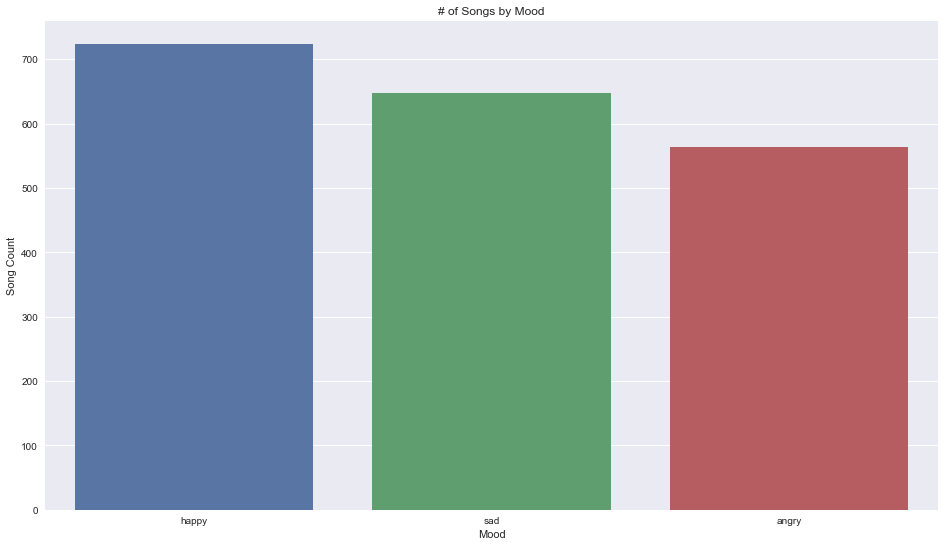

In [18]:
#number of songs per mood

fig, ax = plt.subplots(figsize=(16,9))
sns.barplot(x=df_playlists_model_set.mood.value_counts().index, y=df_playlists_model_set.mood.value_counts().values);
ax.set_ylabel('Song Count')
ax.set_xlabel('Mood')
ax.set_title('# of Songs by Mood');

### Scaling Data

In [19]:
ss = StandardScaler()


df_playlists_model_set[['duration_ms', 'popularity', 'loudness', 'tempo']] = ss.fit_transform(df_playlists_model_set[['duration_ms', 'popularity', 'loudness', 'tempo']])

In [20]:
df_playlists_model_set

,id,name,popularity,duration_ms,explicit,artists,id_artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,release_datetime,release_year,playlist_names,happy,sad,angry,mood
0,5ZBeML7Lf3FMEVviTyvi8l,Twist And Shout - Remastered 2009,0.538723,-1.283814,0.0,The Beatles,['3WrFJ7ztbogyGnTHbHJFl2'],0.482,0.849,2,-0.717988,1,0.0452,0.6410,0.000008,0.0414,0.937,0.178037,4,1963-03-22,1963,"['happy_47', 'happy_40', 'happy_31']",3,0,0,happy
1,45s88Xopo6KvHc0PQ05aGg,My Generation - Mono Version,-0.083573,-0.270533,0.0,The Who,['67ea9eGLXYMsO2eYQRui3w'],0.299,0.787,0,-0.335690,0,0.0690,0.1400,0.000000,0.2920,0.716,-0.929951,4,1966-04-01,1966,"['happy_39', 'happy_31']",2,0,0,happy
2,7tqhbajSfrz2F7E1Z75ASX,Ain't No Mountain High Enough,0.829128,-1.366474,0.0,"Marvin Gaye, Tammi Terrell","['3koiLjNrgRTNbOwViDipeA', '75jNCko3SnEMI5gwGqrbb8']",0.663,0.600,7,-1.222092,1,0.0320,0.4300,0.000000,0.1840,0.800,0.377105,4,1967-08-29,1967,"['happy_28', 'happy_25']",2,0,0,happy
3,3yrSvpt2l1xhsV9Em88Pul,Brown Eyed Girl,0.746155,-0.631822,0.0,Van Morrison,['44NX2ffIYHr6D4n7RaZF7A'],0.491,0.583,7,-1.250433,1,0.0376,0.1820,0.000000,0.4070,0.907,1.141477,4,1967-09-01,1967,"['happy_29', 'happy_21']",2,0,0,happy
4,6dGnYIeXmHdcikdzNNDMm2,Here Comes The Sun - Remastered 2009,0.870615,-0.575493,0.0,The Beatles,['3WrFJ7ztbogyGnTHbHJFl2'],0.557,0.540,9,-1.105714,1,0.0347,0.0339,0.002480,0.1790,0.394,0.346651,4,1969-09-26,1969,"['happy_41', 'happy_40', 'happy_32', 'happy_20', 'happy_15']",5,0,0,happy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1930,4xv8q7odO8UiQjpxThZJrf,We Will Always Be,-1.162220,-1.273853,0.0,"['Nate VanDeusen', 'Horizon Blue']",0,0.717,0.830,0,-0.096602,1,0.0811,0.7610,0.000017,0.4010,0.434,0.079171,4,2020-07-10,2020,"['happy_14', 'happy_10']",2,0,0,happy
1931,2FczCis9Te3whIdtkR3fBV,Please Don't Say You Love Me - Piano Version,-0.871815,0.257933,0.0,['Gabrielle Aplin'],0,0.424,0.183,2,-1.743683,1,0.0379,0.9430,0.000001,0.1640,0.401,0.224424,4,2013-02-08,2013,"['sad_50', 'sad_19']",0,2,0,sad
1932,2usxQITOSDqvkYiI0oIwao,You should be sad,-2.531272,-0.117148,1.0,['Halsey'],0,0.591,0.585,2,0.140676,1,0.0277,0.1430,0.000000,0.1090,0.324,-0.330442,4,2020-01-10,2020,"['angry_24', 'angry_23', 'angry_7']",0,0,3,angry
1933,6nzhhT57iQYrbqumru9NNP,ABC,-2.572759,-0.709235,0.0,['The Jackson 5'],0,0.559,0.752,8,-0.973658,1,0.0581,0.4480,0.000610,0.0907,0.946,2.520844,4,1995-01-01,1995,"['happy_40', 'happy_37']",2,0,0,happy


### Visualization

In [53]:
df_features_median = df_playlists_model_set.groupby('mood')[['popularity',
 'duration_ms',
 'energy',
 'speechiness',
 'liveness',
 'valence',
 'tempo',
 'explicit']].median()

In [54]:
features = ['popularity',
 'duration_ms',
 'energy',
 'speechiness',
 'liveness',
 'valence',
 'tempo',
 'explicit']

fig = go.Figure(data=[
    go.Bar(name='angry', x=df_features_median.loc['angry'].index, y=df_features_median.loc['angry'].values),
    go.Bar(name='happy', x=df_features_median.loc['happy'].index, y=df_features_median.loc['happy'].values),
    go.Bar(name='sad', x=df_features_median.loc['sad'].index, y=df_features_median.loc['sad'].values)

            ])

fig.update_layout(barmode='group')
fig.update_xaxes(title_text="Features")
fig.show()

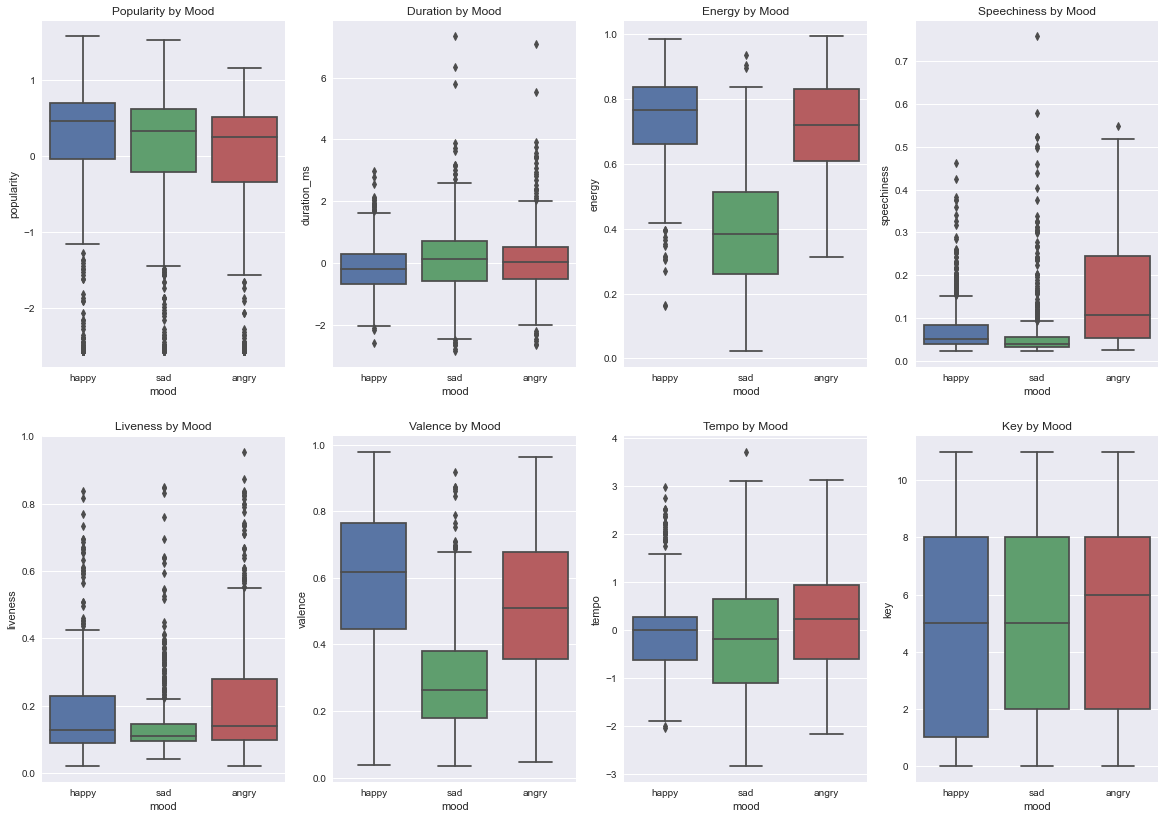

In [69]:
## distribution of features by each mood
fig,ax = plt.subplots(2,4, figsize=(20,14))

sns.boxplot(x=df_playlists_model_set.mood,y=df_playlists_model_set.popularity, ax=ax[0][0])
ax[0][0].set_title('Popularity by Mood')

sns.boxplot(x=df_playlists_model_set.mood,y=df_playlists_model_set.duration_ms, ax=ax[0][1])
ax[0][1].set_title('Duration by Mood')

sns.boxplot(x=df_playlists_model_set.mood,y=df_playlists_model_set.energy, ax=ax[0][2])
ax[0][2].set_title('Energy by Mood')

sns.boxplot(x=df_playlists_model_set.mood,y=df_playlists_model_set.speechiness, ax=ax[0][3])
ax[0][3].set_title('Speechiness by Mood')


sns.boxplot(x=df_playlists_model_set.mood,y=df_playlists_model_set.liveness, ax=ax[1][0])
ax[1][0].set_title('Liveness by Mood')


sns.boxplot(x=df_playlists_model_set.mood,y=df_playlists_model_set.valence, ax=ax[1][1])
ax[1][1].set_title('Valence by Mood')


sns.boxplot(x=df_playlists_model_set.mood,y=df_playlists_model_set.tempo, ax=ax[1][2])
ax[1][2].set_title('Tempo by Mood')


sns.boxplot(x=df_playlists_model_set.mood,y=df_playlists_model_set.key, ax=ax[1][3])
ax[1][3].set_title('Key by Mood');
